In [27]:
import pandas as pd

In [33]:
df = pd.read_csv("AgeDataset-V1.csv")

In [29]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [34]:
df["Gender"].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Female; Male                                           7
Intersex                                               7
Transgender Male; Female                               3
Eunuch                                                 3
Intersex; Male                                         2
Non-Binary                                             2
Transgender Female; Male                               2
Intersex; Female                                       2
Transgender Person; Intersex; Transgender Male         1
Transgender Male; Male                                 1
Non-Binary; Intersex                                   1
Intersex; Transgender Male                             1
Female; Female                 

In [37]:
# SOSTITUISCO I GENDER DIVERSI DA MASCHIO E FEMMINA CON 'ALTRO'
df['Gender']=df['Gender'].replace({'Transgender Female':'Other','Transgender Male':'Other', 'Eunuch; Male':'Other','Female; Male':'Other', 'Intersex':'Other', 'Transgender Male; Female':'Other', 'Eunuch':'Other', 'Intersex; Male':'Other', 'Non-Binary':'Other', 'Transgender Female; Male':'Other', 'Intersex; Female':'Other', 'Transgender Person; Intersex; Transgender Male':'Other', 'Transgender Male; Male':'Other', 'Non-Binary; Intersex':'Other', 'Intersex; Transgender Male':'Other', 'Female; Female':'Other', 'Transgender Female; Intersex':'Other', 'Transgender Female; Female':'Other'})

In [38]:
df["Gender"].value_counts()

Male      981365
Female    107830
Other        168
Name: Gender, dtype: int64

In [39]:
# CONTO I NULL
df.isnull().sum()

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
dtype: int64

In [40]:
# RIMUOVO I GENDER NULL
df = df[df['Gender'].notna()]

# CONTO I NULL
df.isnull().sum()

Id                         0
Name                       0
Short description      48528
Gender                     0
Country               292568
Occupation            167579
Birth year                 0
Death year                 1
Manner of death      1037258
Age of death               1
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089363 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1089363 non-null  object 
 1   Name               1089363 non-null  object 
 2   Short description  1040835 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            796795 non-null   object 
 5   Occupation         921784 non-null   object 
 6   Birth year         1089363 non-null  int64  
 7   Death year         1089362 non-null  float64
 8   Manner of death    52105 non-null    object 
 9   Age of death       1089362 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 91.4+ MB


In [42]:
import matplotlib.pyplot as plt

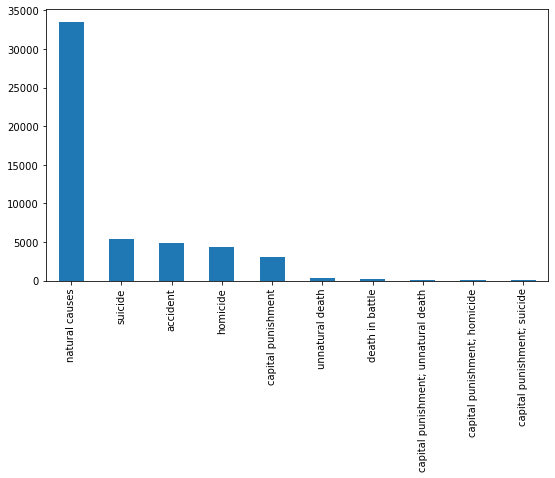

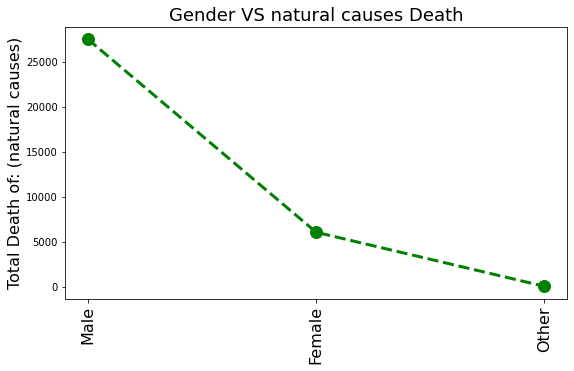

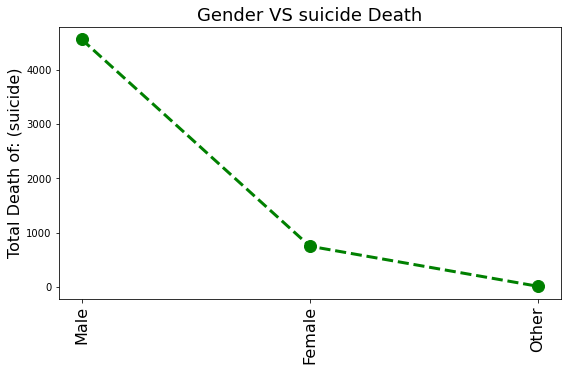

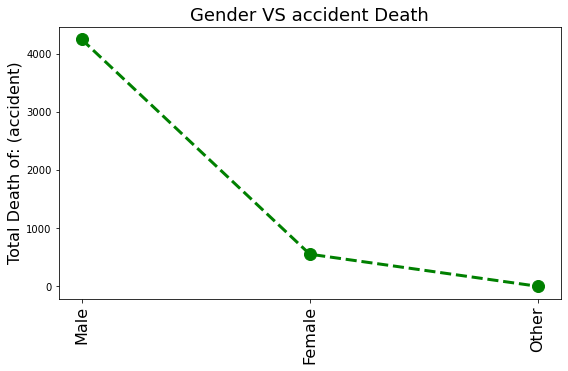

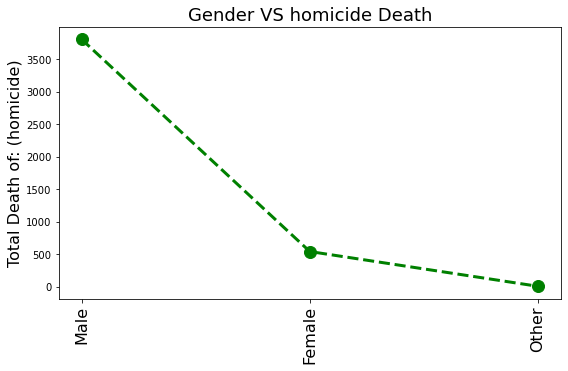

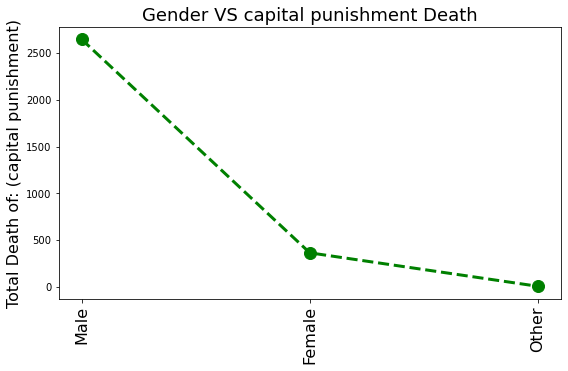

In [43]:
# SESSO PER TIPO DI MORTE
colum_txt=df['Manner of death'].value_counts().nlargest(5)
list_arr=colum_txt.index.tolist()
df['Manner of death'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr:
    count_dat=df[df['Manner of death']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of: ('+i+')',fontsize=16)
    plt.show()

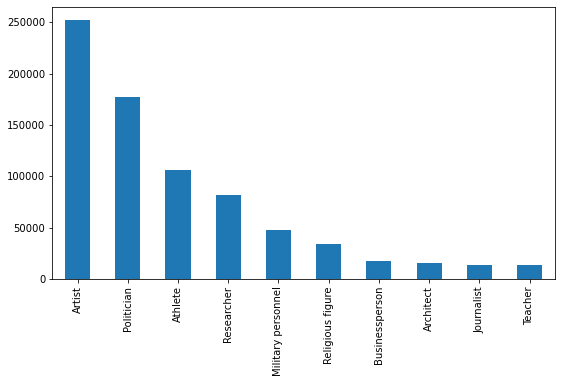

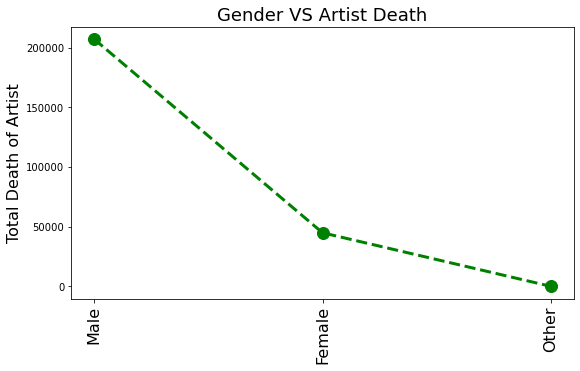

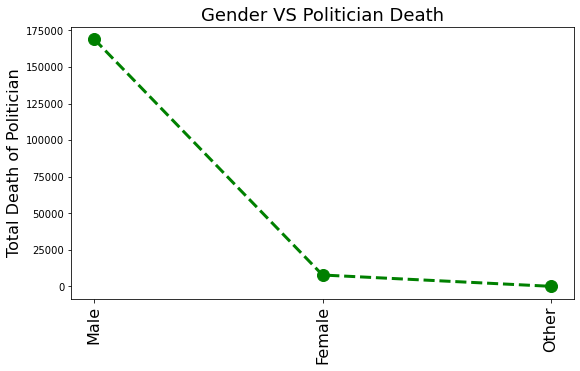

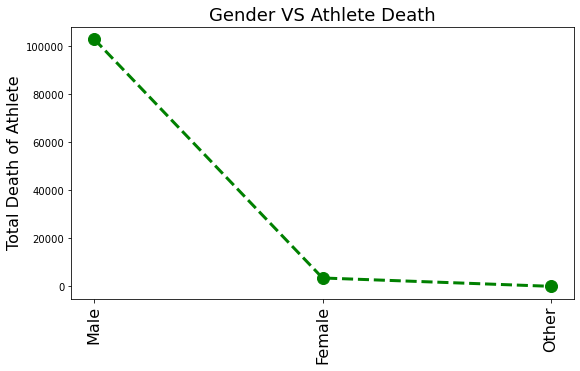

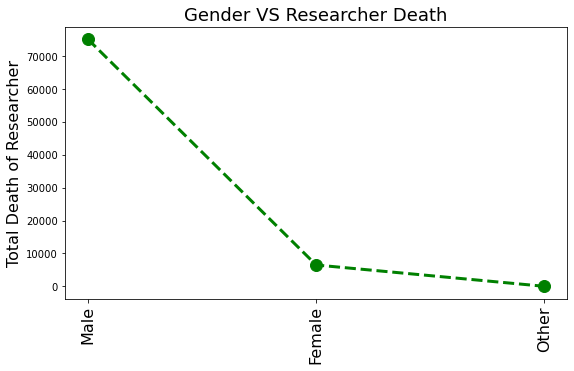

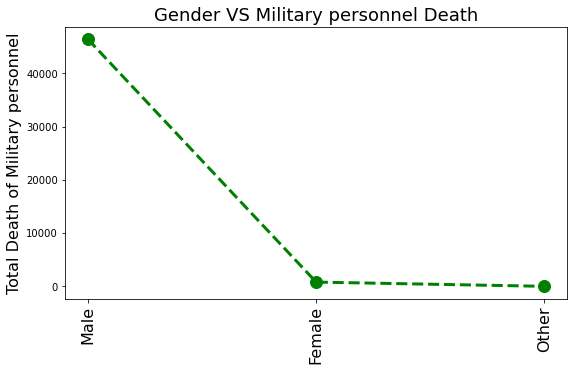

In [53]:
# LAVORO PER TIPO DI MORTE
colum_txt=df['Occupation'].value_counts().nlargest(5)
list_arr=colum_txt.index.tolist()
df['Occupation'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr:
    count_dat=df[df['Occupation']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+i,fontsize=16)
    plt.show()

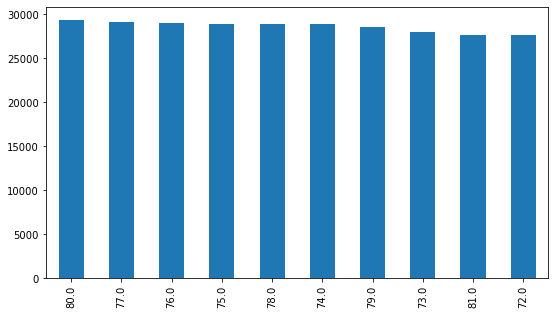

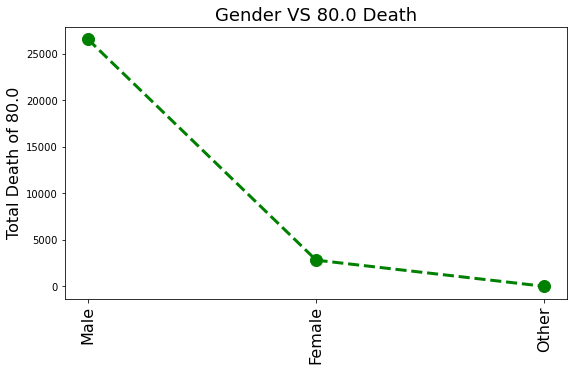

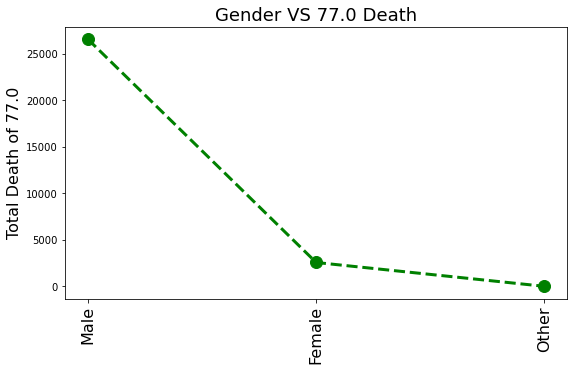

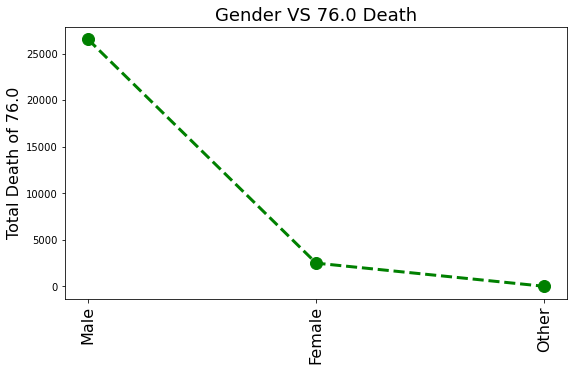

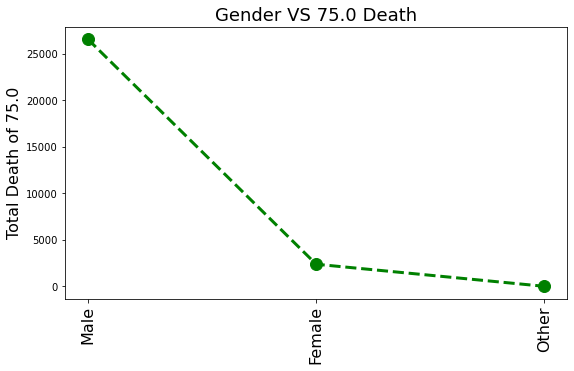

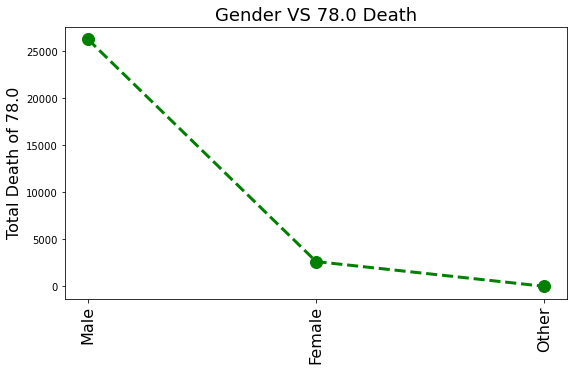

In [54]:
# SESSO PER ETA' DI MORTE
colum_txt=df['Age of death'].value_counts().nlargest(5)
list_arr1=colum_txt.index.tolist()
df['Age of death'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr1:
    count_dat=df[df['Age of death']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+str(i)+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+str(i),fontsize=16)
    plt.show()

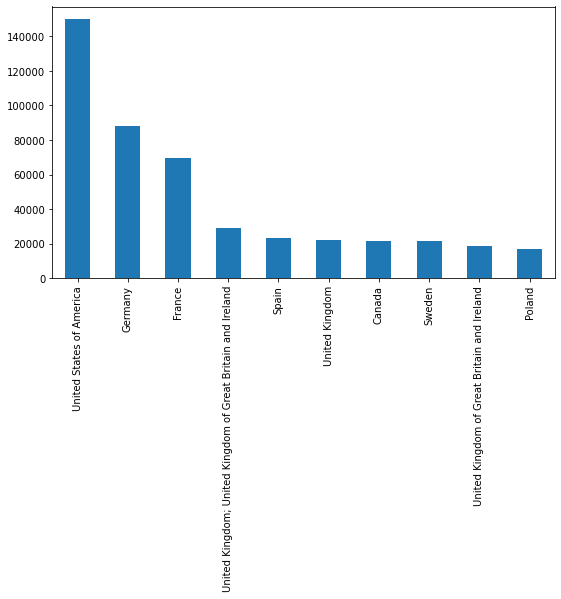

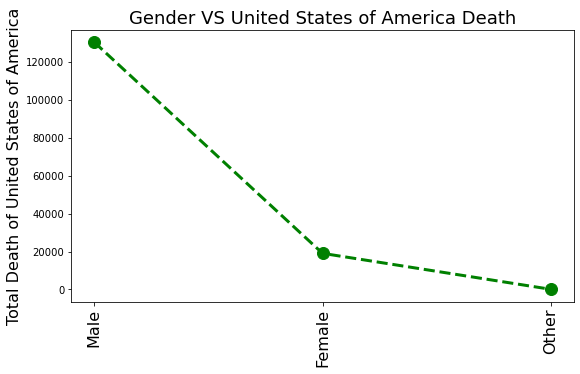

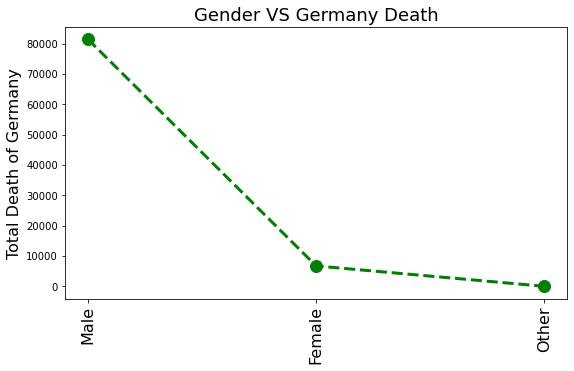

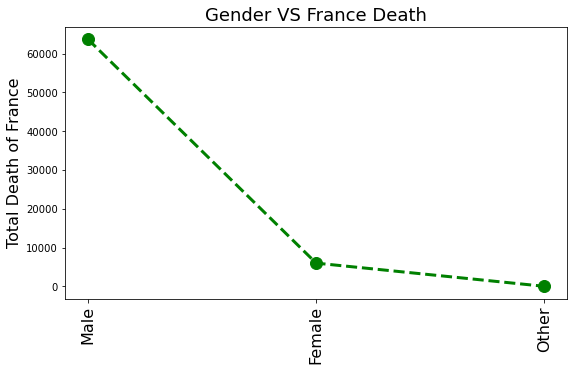

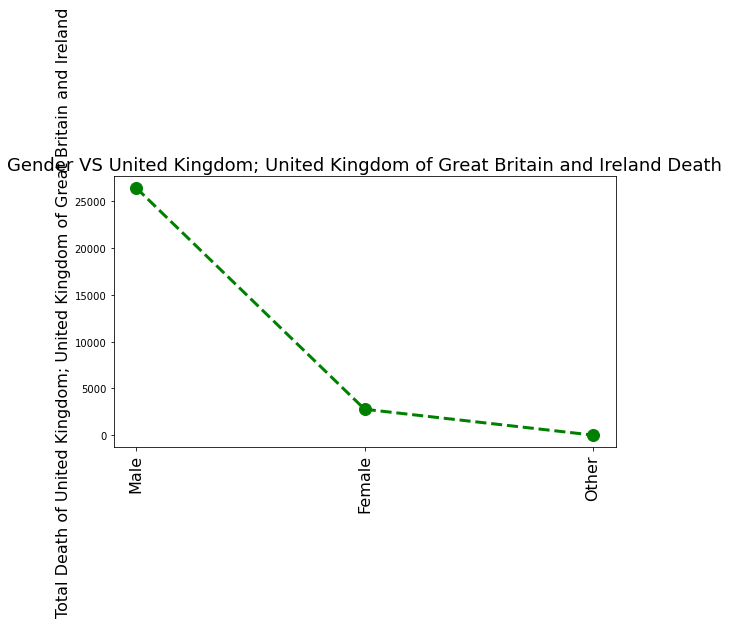

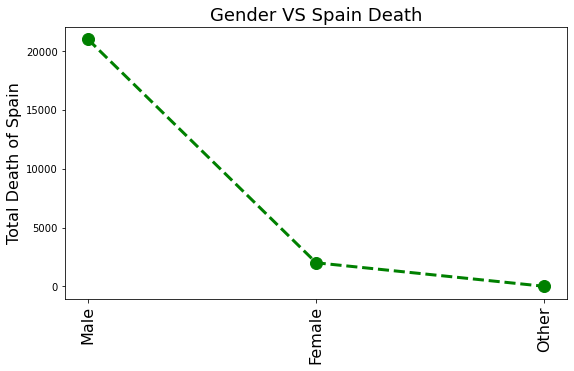

In [46]:
# SESSO PER NAZIONE
df['Country'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))
colum_txt=df['Country'].value_counts().nlargest(5)
list_arr1=colum_txt.index.tolist()

for i in list_arr1:
    count_dat=df[df['Country']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+i ,fontsize=16)
    plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089363 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1089363 non-null  object 
 1   Name               1089363 non-null  object 
 2   Short description  1040835 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            796795 non-null   object 
 5   Occupation         921784 non-null   object 
 6   Birth year         1089363 non-null  int64  
 7   Death year         1089362 non-null  float64
 8   Manner of death    52105 non-null    object 
 9   Age of death       1089362 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 91.4+ MB


In [48]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [49]:
df.pop("Id")
df.pop("Short description")
df.head()

,Name,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Douglas Adams,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Abraham Lincoln,Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [65]:
df["Occupation"].value_counts()

Artist                         252154
Politician                     176755
Athlete                        106436
Researcher                      81742
Military personnel              47236
                                ...  
Art dealer; homekeeper              1
Librarian; museum registrar         1
Ethnologist; ethnographer           1
Martial arts                        1
Farmer; motorcycle racer            1
Name: Occupation, Length: 8909, dtype: int64

<BarContainer object of 8909 artists>

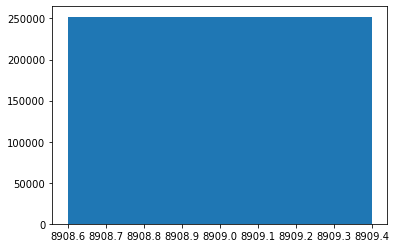

In [63]:
plt.bar(x=len(df["Occupation"].value_counts()), height=df["Occupation"].value_counts())

In [66]:
import seaborn as sns

In [102]:
count = df["Occupation"].value_counts()
count[count.values>100].sort_values().head(25)

c = count[count.values<100]
c

Brother                                    98
Choreographer; dancer                      97
Professional wrestler; amateur wrestler    97
Executioner                                96
Genealogist                                96
                                           ..
Art dealer; homekeeper                      1
Librarian; museum registrar                 1
Ethnologist; ethnographer                   1
Martial arts                                1
Farmer; motorcycle racer                    1
Name: Occupation, Length: 8699, dtype: int64

In [77]:
count.shape

(8909,)

<AxesSubplot:>

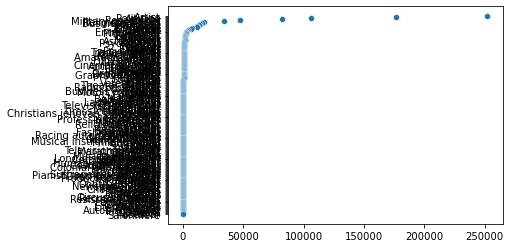

In [79]:
sns.scatterplot(data=count, x=count.values[count.values>100], y=count.index[count.values>100])

In [82]:
count.head(100)

Artist                 252154
Politician             176755
Athlete                106436
Researcher              81742
Military personnel      47236
                        ...  
Meteorologist             301
Sociologist               293
Geheimrat                 279
Cross-country skier       277
Condottiero               271
Name: Occupation, Length: 100, dtype: int64